# Imagem com uso do FloodFill gradualmente

In [ ]:
#@title Carregando Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


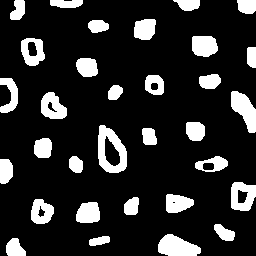

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

try:
  img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/PDI/img/bolhas.png', cv2.IMREAD_GRAYSCALE)
except:
  print('Falha ao carregar imagem')
else:
  cv2_imshow(img)
img_nv_al=img.copy()
col,lin=img.shape

Tem 32 objetos.


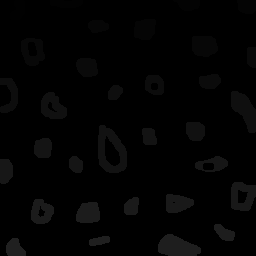

In [ ]:
n_obj=0
p=[0,0]
for i in range(0, col):
  for j in range(0,lin):
    if img[i][j] == 255:
      n_obj+=1
      p[0] = j
      p[1] = i
      cv2.floodFill(img, None, p, n_obj)
print(f'Tem {n_obj} objetos.')
cv2_imshow(img)

# Incrementando algortimo de contagem

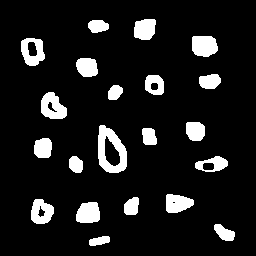

In [ ]:
#@title Elimina bolhas da borda
#mudando a borda

for i in range (0,col): #colunas
  if img_nv_al[i][0] == 255:
    cv2.floodFill(img_nv_al,None,[0,i], 0)
  if img_nv_al[0][i] == 255:
    cv2.floodFill(img_nv_al,None,[i,0], 0)

for i in range (0,lin): #linhas
  if img_nv_al[i][255] == 255:
    cv2.floodFill(img_nv_al,None,[255,i], 0)
  if img_nv_al[255][i] == 255:
    cv2.floodFill(img_nv_al,None,[i,255], 0)

cv2_imshow(img_nv_al)


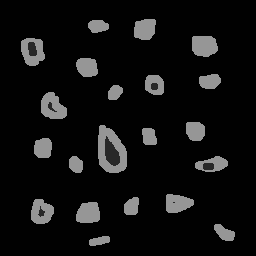

Há 21 de objetos, dos quais, 7 tem bolhas e 14 estão sem bolhas.


In [ ]:
#@title Contar bolhas com e sem buracos

#Colonado todas as bordas para preto
cv2.floodFill(img_nv_al,None, (0,0), 0)

#Alterando o plano de fundo para um valor maior
cv2.floodFill(img_nv_al,None, (0,0), 1)

#numero total de bolhas
total=0
p=[0,0]
for i in range(0, col):
  for j in range(0,lin):
    if img_nv_al[i][j] == 255:
      total+=1
      p[0] = j
      p[1] = i
      cv2.floodFill(img_nv_al, None, p, 150)
#buscando elementos com bolhas
com_bolhas=0
for i in range(0,col):
  for j in range(0,lin):
    if img_nv_al[i][j]==0:
      com_bolhas+=1
      p[0]=j
      p[1]=i
      cv2.floodFill(img_nv_al, None, p, 40)

cv2_imshow(img_nv_al)
print(f'Há {total} de objetos, dos quais, {com_bolhas} tem bolhas e {total-com_bolhas} estão sem bolhas.')